# Análise Exploratória dos Dados de Fraude em Cartões de Crédito

Este notebook apresenta uma análise exploratória detalhada do conjunto de dados de fraude em transações de cartão de crédito. Vamos explorar os padrões, tendências e características que podem ajudar a identificar transações fraudulentas.

## Conteúdo
1. [Configuração do Ambiente](#1.-Configuração-do-Ambiente)
2. [Carregamento dos Dados](#2.-Carregamento-dos-Dados)
3. [Visão Geral dos Dados](#3.-Visão-Geral-dos-Dados)
4. [Análise de Valores Ausentes](#4.-Análise-de-Valores-Ausentes)
5. [Distribuição das Classes](#5.-Distribuição-das-Classes)
6. [Análise Temporal](#6.-Análise-Temporal)
7. [Análise Geográfica](#7.-Análise-Geográfica)
8. [Análise de Valores de Transação](#8.-Análise-de-Valores-de-Transação)
9. [Análise de Dígitos](#9.-Análise-de-Dígitos)
10. [Correlações entre Variáveis](#10.-Correlações-entre-Variáveis)
11. [Conclusões](#11.-Conclusões)

## 1. Configuração do Ambiente

Vamos importar as bibliotecas necessárias e configurar o ambiente para nossa análise.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
import os
import sys

# Configurações de visualização
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configurar exibição de dados no pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Carregamento dos Dados

Vamos carregar os conjuntos de dados de treino e teste para nossa análise.

In [2]:
# Definir caminhos para os arquivos
# Ajuste os caminhos conforme necessário para seu ambiente
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_dir = os.path.join(base_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')

train_path = os.path.join(raw_dir, 'fraudTrain.csv')
test_path = os.path.join(raw_dir, 'fraudTest.csv')

# Verificar se os arquivos existem
if not os.path.exists(train_path) or not os.path.exists(test_path):
    print(f"Erro: Arquivos não encontrados em {raw_dir}")
    print("Por favor, coloque os arquivos 'fraudTrain.csv' e 'fraudTest.csv' no diretório 'data/raw'")
else:
    # Carregar os dados
    print("Carregando dados...")
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    
    print(f"Conjunto de treino: {train_df.shape[0]} linhas, {train_df.shape[1]} colunas")
    print(f"Conjunto de teste: {test_df.shape[0]} linhas, {test_df.shape[1]} colunas")

Carregando dados...
Conjunto de treino: 1296675 linhas, 23 colunas
Conjunto de teste: 555719 linhas, 23 colunas


## 3. Visão Geral dos Dados

Vamos examinar a estrutura dos dados, os tipos de variáveis e algumas estatísticas básicas.

In [3]:
# Visualizar as primeiras linhas do conjunto de treino
print("Primeiras linhas do conjunto de treino:")
train_df.head()

Primeiras linhas do conjunto de treino:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [4]:
# Informações sobre os tipos de dados
print("Informações sobre os tipos de dados:")
train_df.info()

Informações sobre os tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-

In [5]:
# Estatísticas descritivas para variáveis numéricas
print("Estatísticas descritivas para variáveis numéricas:")
train_df.describe().T

Estatísticas descritivas para variáveis numéricas:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.00,648337.00,374317.97,0.00,324168.50,648337.00,972505.50,1296674.00
cc_num,1296675.00,417192042079726656.00,1308806447000789248.00,60416207185.00,180042946491150.00,3521417320836166.00,4642255475285942.00,4992346398065154048.00
amt,1296675.00,70.35,160.32,1.00,9.65,47.52,83.14,28948.90
zip,1296675.00,48800.67,26893.22,1257.00,26237.00,48174.00,72042.00,99783.00
lat,1296675.00,38.54,5.08,20.03,34.62,39.35,41.94,66.69
long,1296675.00,-90.23,13.76,-165.67,-96.80,-87.48,-80.16,-67.95
city_pop,1296675.00,88824.44,301956.36,23.00,743.00,2456.00,20328.00,2906700.00
unix_time,1296675.00,1349243636.73,12841278.42,1325376018.00,1338750742.50,1349249747.00,1359385375.50,1371816817.00
merch_lat,1296675.00,38.54,5.11,19.03,34.73,39.37,41.96,67.51
merch_long,1296675.00,-90.23,13.77,-166.67,-96.90,-87.44,-80.24,-66.95


In [6]:
# Estatísticas descritivas para variáveis categóricas
print("Estatísticas descritivas para variáveis categóricas:")
train_df.describe(include=['object']).T

Estatísticas descritivas para variáveis categóricas:


,count,unique,top,freq
trans_date_trans_time,1296675,1274791,2019-04-22 16:02:01,4
merchant,1296675,693,fraud_Kilback LLC,4403
category,1296675,14,gas_transport,131659
first,1296675,352,Christopher,26669
last,1296675,481,Smith,28794
gender,1296675,2,F,709863
street,1296675,983,0069 Robin Brooks Apt. 695,3123
city,1296675,894,Birmingham,5617
state,1296675,51,TX,94876
job,1296675,494,Film/video editor,9779


## 4. Análise de Valores Ausentes

Vamos verificar se existem valores ausentes nos conjuntos de dados.

In [7]:
# Verificar valores ausentes no conjunto de treino
train_missing = train_df.isnull().sum()
train_missing = train_missing[train_missing > 0]

if len(train_missing) > 0:
    print("Valores ausentes no conjunto de treino:")
    print(train_missing)
else:
    print("Não há valores ausentes no conjunto de treino.")

Não há valores ausentes no conjunto de treino.


In [8]:
# Verificar valores ausentes no conjunto de teste
test_missing = test_df.isnull().sum()
test_missing = test_missing[test_missing > 0]

if len(test_missing) > 0:
    print("Valores ausentes no conjunto de teste:")
    print(test_missing)
else:
    print("Não há valores ausentes no conjunto de teste.")

Não há valores ausentes no conjunto de teste.


## 5. Distribuição das Classes

Vamos analisar a distribuição das classes (fraude vs. não fraude) para entender o desbalanceamento dos dados.

In [9]:
# Contagem de transações fraudulentas e não fraudulentas
fraud_counts = train_df['is_fraud'].value_counts()
fraud_percentage = train_df['is_fraud'].value_counts(normalize=True) * 100

print("Contagem de transações por classe:")
print(fraud_counts)
print("\nPercentual de transações por classe:")
print(fraud_percentage)

Contagem de transações por classe:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Percentual de transações por classe:
is_fraud
0   99.42
1    0.58
Name: proportion, dtype: float64


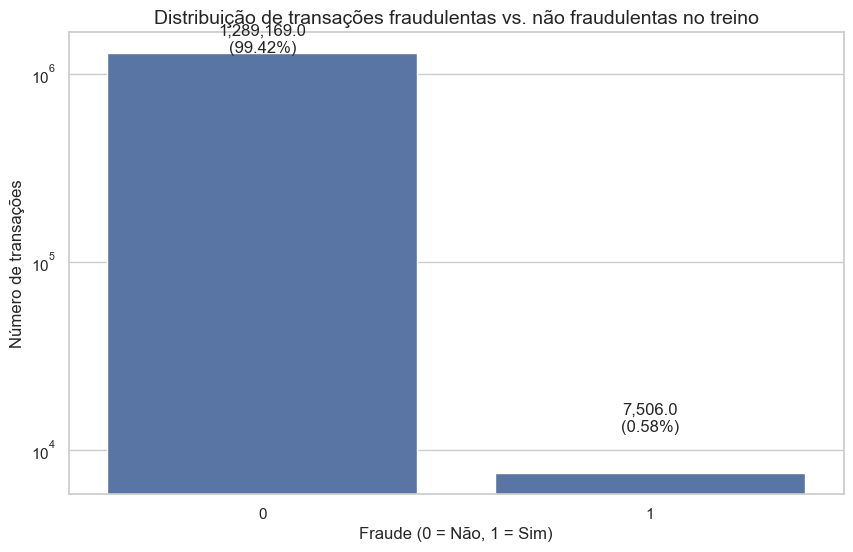

In [12]:
# Visualizar a distribuição das classes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='is_fraud', data=train_df)

# Adicionar rótulos com contagens e percentuais
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5000,
            f'{height:,}\n({height/train_df.shape[0]*100:.2f}%)',
            ha="center", fontsize=12)

plt.title('Distribuição de transações fraudulentas vs. não fraudulentas no treino', fontsize=14)
plt.xlabel('Fraude (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de transações', fontsize=12)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.show()

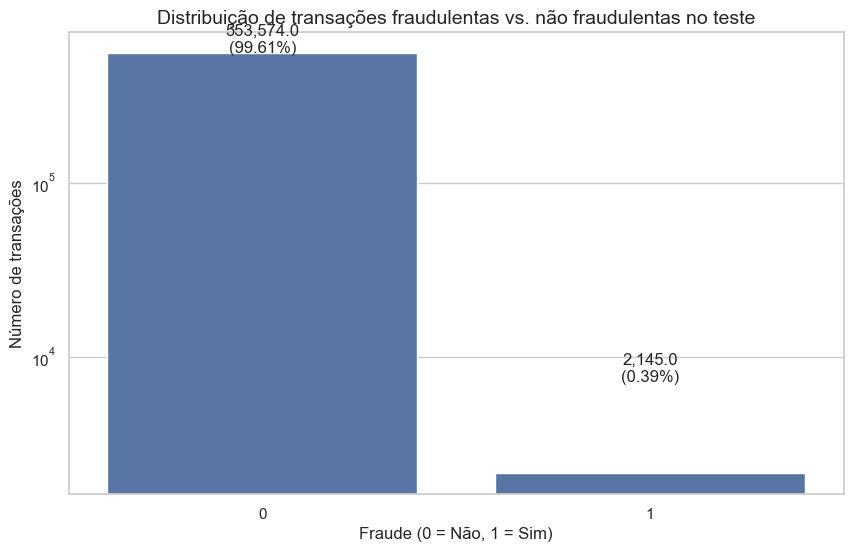

In [11]:
# Visualizar a distribuição das classes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='is_fraud', data=test_df)

# Adicionar rótulos com contagens e percentuais
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5000,
            f'{height:,}\n({height/test_df.shape[0]*100:.2f}%)',
            ha="center", fontsize=12)

plt.title('Distribuição de transações fraudulentas vs. não fraudulentas no teste', fontsize=14)
plt.xlabel('Fraude (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de transações', fontsize=12)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.show()

## 6. Análise Temporal

Vamos analisar os padrões temporais das transações fraudulentas.

In [13]:
# Converter a coluna de data/hora para datetime
train_df['transaction_timestamp'] = pd.to_datetime(train_df['trans_date_trans_time'])

# Extrair componentes temporais
train_df['hour_of_day'] = train_df['transaction_timestamp'].dt.hour
train_df['day_of_week'] = train_df['transaction_timestamp'].dt.dayofweek + 1  # 1=Segunda, 7=Domingo
train_df['month'] = train_df['transaction_timestamp'].dt.month

# Visualizar as primeiras linhas com os novos componentes temporais
train_df[['trans_date_trans_time', 'transaction_timestamp', 'hour_of_day', 'day_of_week', 'month', 'is_fraud']].head()

,trans_date_trans_time,transaction_timestamp,hour_of_day,day_of_week,month,is_fraud
0,2019-01-01 00:00:18,2019-01-01 00:00:18,0,2,1,0
1,2019-01-01 00:00:44,2019-01-01 00:00:44,0,2,1,0
2,2019-01-01 00:00:51,2019-01-01 00:00:51,0,2,1,0
3,2019-01-01 00:01:16,2019-01-01 00:01:16,0,2,1,0
4,2019-01-01 00:03:06,2019-01-01 00:03:06,0,2,1,0


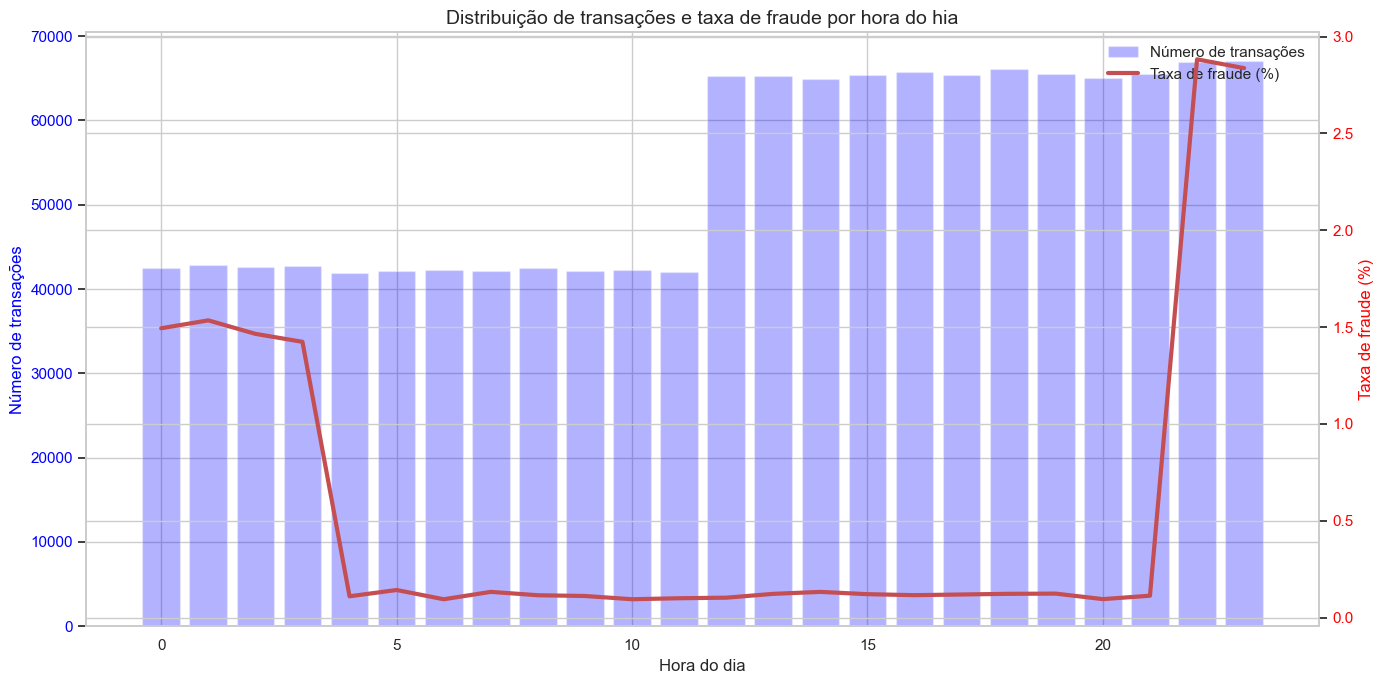

In [16]:
# Análise por hora do dia
hour_fraud = train_df.groupby('hour_of_day')['is_fraud'].mean() * 100
hour_counts = train_df.groupby('hour_of_day').size()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para contagem de transações
ax1.bar(hour_counts.index, hour_counts.values, alpha=0.3, color='blue', label='Número de transações')
ax1.set_xlabel('Hora do dia', fontsize=12)
ax1.set_ylabel('Número de transações', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Gráfico de linha para taxa de fraude
ax2 = ax1.twinx()
ax2.plot(hour_fraud.index, hour_fraud.values, 'r-', linewidth=3, label='Taxa de fraude (%)')
ax2.set_ylabel('Taxa de fraude (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título e legenda
plt.title('Distribuição de transações e taxa de fraude por hora do hia', fontsize=14)
fig.tight_layout()

# Adicionar legenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

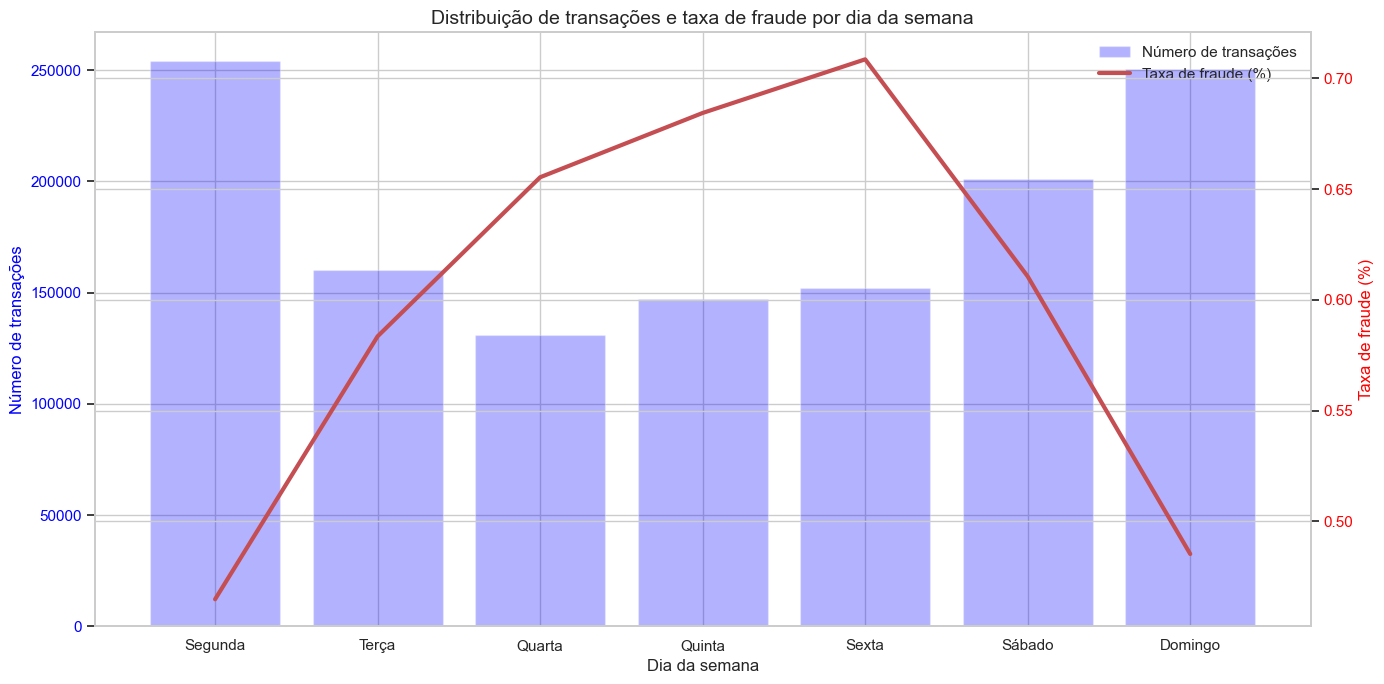

In [15]:
# Análise por dia da semana
day_fraud = train_df.groupby('day_of_week')['is_fraud'].mean() * 100
day_counts = train_df.groupby('day_of_week').size()

# Mapear números para nomes dos dias
day_names = {1: 'Segunda', 2: 'Terça', 3: 'Quarta', 4: 'Quinta', 5: 'Sexta', 6: 'Sábado', 7: 'Domingo'}
day_fraud.index = [day_names[day] for day in day_fraud.index]
day_counts.index = [day_names[day] for day in day_counts.index]

fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para contagem de transações
ax1.bar(day_counts.index, day_counts.values, alpha=0.3, color='blue', label='Número de transações')
ax1.set_xlabel('Dia da semana', fontsize=12)
ax1.set_ylabel('Número de transações', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Gráfico de linha para taxa de fraude
ax2 = ax1.twinx()
ax2.plot(day_fraud.index, day_fraud.values, 'r-', linewidth=3, label='Taxa de fraude (%)')
ax2.set_ylabel('Taxa de fraude (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título e legenda
plt.title('Distribuição de transações e taxa de fraude por dia da semana', fontsize=14)
fig.tight_layout()

# Adicionar legenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

## 7. Análise Geográfica

Vamos analisar a distribuição geográfica das transações e a relação entre a localização do cliente e do comerciante.

In [17]:
# Função para calcular a distância Haversine entre dois pontos
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calcula a distância Haversine entre dois pontos em km
    """
    # Converter graus para radianos
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Fórmula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Raio da Terra em quilômetros
    
    return c * r

# Calcular a distância entre cliente e comerciante
train_df['distance_km'] = haversine_distance(
    train_df['lat'].values, train_df['long'].values,
    train_df['merch_lat'].values, train_df['merch_long'].values
)

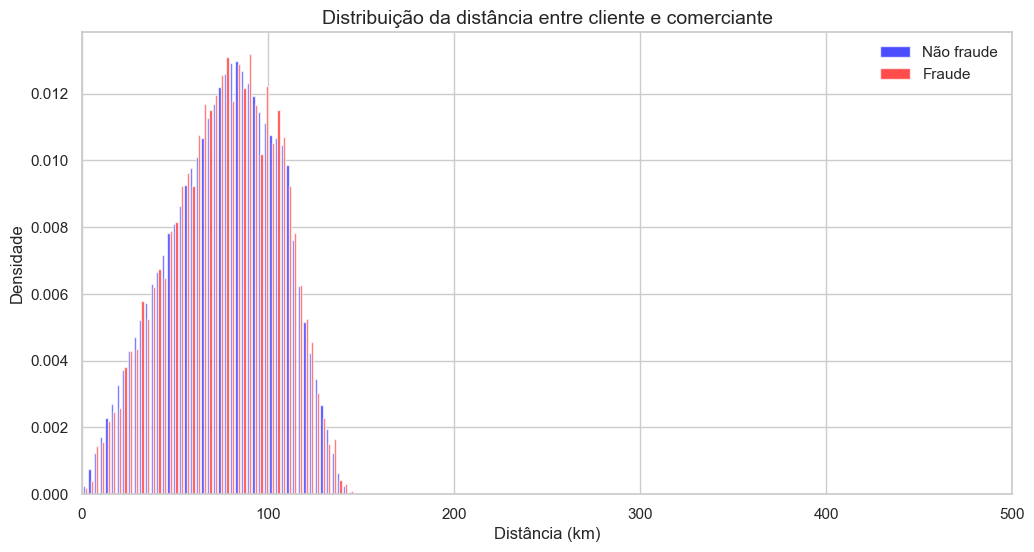

Estatísticas de distância para transações não fraudulentas:
count   1289169.00
mean         76.11
std          29.12
min           0.02
25%          55.33
50%          78.23
75%          98.50
max         152.12
Name: distance_km, dtype: float64

Estatísticas de distância para transações fraudulentas:
count   7506.00
mean      76.27
std       28.75
min        0.74
25%       55.63
50%       77.93
75%       98.39
max      144.52
Name: distance_km, dtype: float64


In [18]:
# Visualizar a distribuição das distâncias
plt.figure(figsize=(12, 6))

# Separar por classe
distances_fraud = train_df[train_df['is_fraud'] == 1]['distance_km']
distances_non_fraud = train_df[train_df['is_fraud'] == 0]['distance_km']

# Plotar histogramas
plt.hist([distances_non_fraud, distances_fraud], bins=50, 
         label=['Não fraude', 'Fraude'], alpha=0.7,
         color=['blue', 'red'], density=True)

plt.title('Distribuição da distância entre cliente e comerciante', fontsize=14)
plt.xlabel('Distância (km)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.xlim(0, 500)  # Limitar para melhor visualização
plt.show()

# Estatísticas das distâncias
print("Estatísticas de distância para transações não fraudulentas:")
print(distances_non_fraud.describe())
print("\nEstatísticas de distância para transações fraudulentas:")
print(distances_fraud.describe())

In [19]:
# Análise por estado
state_fraud = train_df.groupby('state')['is_fraud'].mean() * 100
state_counts = train_df.groupby('state').size()

# Combinar em um DataFrame
state_analysis = pd.DataFrame({
    'Transações': state_counts,
    'Taxa de fraude (%)': state_fraud
}).sort_values('Taxa de fraude (%)', ascending=False)

# Mostrar os 15 estados com maior taxa de fraude
state_analysis.head(15)

,Transações,Taxa de fraude (%)
state,,
DE,9,100.00
RI,550,2.73
AK,2120,1.70
NV,5607,0.84
CO,13880,0.81
OR,18597,0.80
TN,17554,0.80
NE,24168,0.74
ME,16505,0.72


## 8. Análise de Valores de Transação

Vamos analisar a distribuição dos valores das transações e sua relação com fraudes.

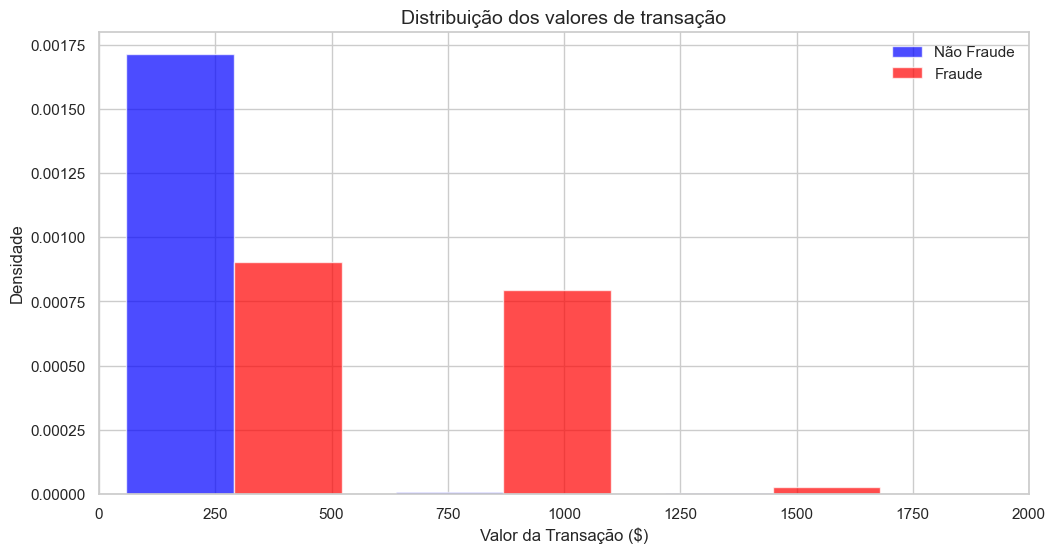

Estatísticas de valores para transações não fraudulentas:
count   1289169.00
mean         67.67
std         154.01
min           1.00
25%           9.61
50%          47.28
75%          82.54
max       28948.90
Name: amt, dtype: float64

Estatísticas de valores para transações fraudulentas:
count   7506.00
mean     531.32
std      390.56
min        1.06
25%      245.66
50%      396.50
75%      900.88
max     1376.04
Name: amt, dtype: float64


In [20]:
# Visualizar a distribuição dos valores de transação
plt.figure(figsize=(12, 6))

# Separar por classe
amt_fraud = train_df[train_df['is_fraud'] == 1]['amt']
amt_non_fraud = train_df[train_df['is_fraud'] == 0]['amt']

# Plotar histogramas
plt.hist([amt_non_fraud, amt_fraud], bins=50, 
         label=['Não Fraude', 'Fraude'], alpha=0.7, 
         color=['blue', 'red'], density=True)

plt.title('Distribuição dos valores de transação', fontsize=14)
plt.xlabel('Valor da Transação ($)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.xlim(0, 2000)  # Limitar para melhor visualização
plt.show()

# Estatísticas dos valores
print("Estatísticas de valores para transações não fraudulentas:")
print(amt_non_fraud.describe())
print("\nEstatísticas de valores para transações fraudulentas:")
print(amt_fraud.describe())

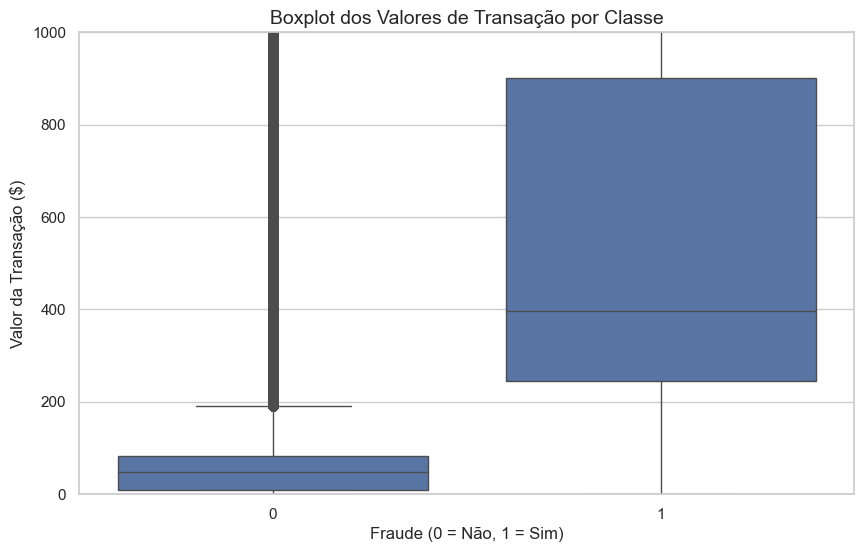

In [21]:
# Boxplot dos valores de transação por classe
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_df)
plt.title('Boxplot dos Valores de Transação por Classe', fontsize=14)
plt.xlabel('Fraude (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Valor da Transação ($)', fontsize=12)
plt.ylim(0, 1000)  # Limitar para melhor visualização
plt.show()

## 9. Análise de Dígitos

Vamos analisar a distribuição dos primeiros e últimos dígitos dos valores de transação, que podem revelar padrões interessantes.

In [22]:
# Extrair primeiro e último dígito do valor da transação
train_df['amt_str'] = train_df['amt'].astype(str)

# Primeiro dígito (não zero)
train_df['first_digit'] = train_df['amt_str'].str.replace(r'^0+', '').str[0].astype(int)

# Último dígito
train_df['last_digit'] = train_df['amt_str'].str[-1].astype(int)

<Figure size 1200x600 with 0 Axes>

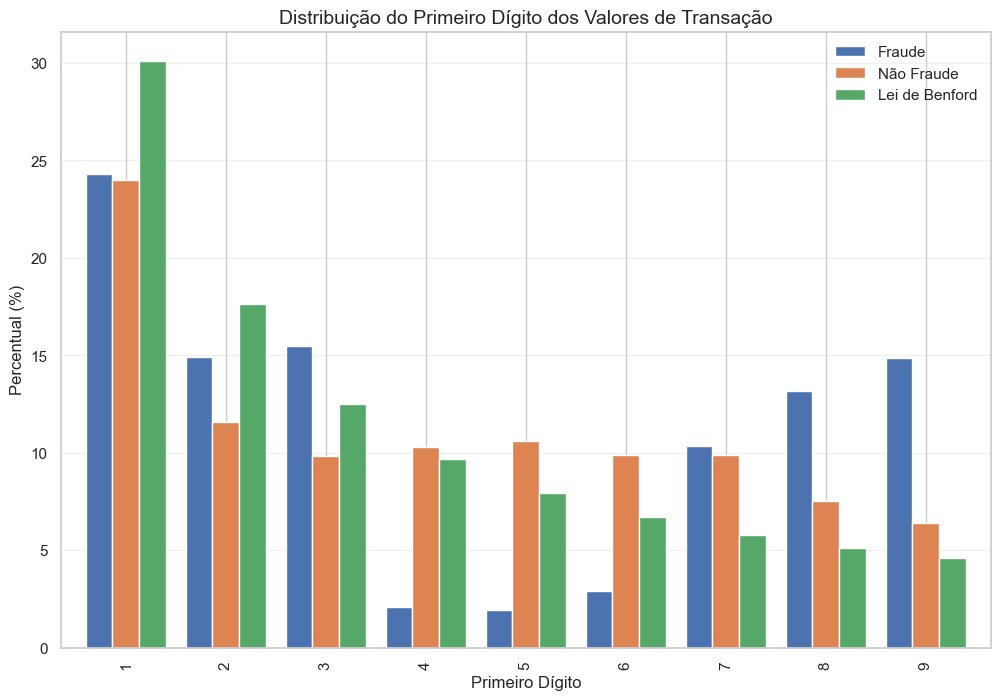

In [23]:
# Análise do primeiro dígito
# Separar por classe
first_digit_fraud = train_df[train_df['is_fraud'] == 1]['first_digit'].value_counts(normalize=True).sort_index() * 100
first_digit_non_fraud = train_df[train_df['is_fraud'] == 0]['first_digit'].value_counts(normalize=True).sort_index() * 100

# Lei de Benford (distribuição esperada do primeiro dígito)
benford = pd.Series([np.log10(1 + 1/d) * 100 for d in range(1, 10)], index=range(1, 10))

# Criar DataFrame para plotagem
first_digit_df = pd.DataFrame({
    'Fraude': first_digit_fraud,
    'Não Fraude': first_digit_non_fraud,
    'Lei de Benford': benford
})

# Plotar
plt.figure(figsize=(12, 6))
first_digit_df.plot(kind='bar', width=0.8)
plt.title('Distribuição do Primeiro Dígito dos Valores de Transação', fontsize=14)
plt.xlabel('Primeiro Dígito', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 1200x600 with 0 Axes>

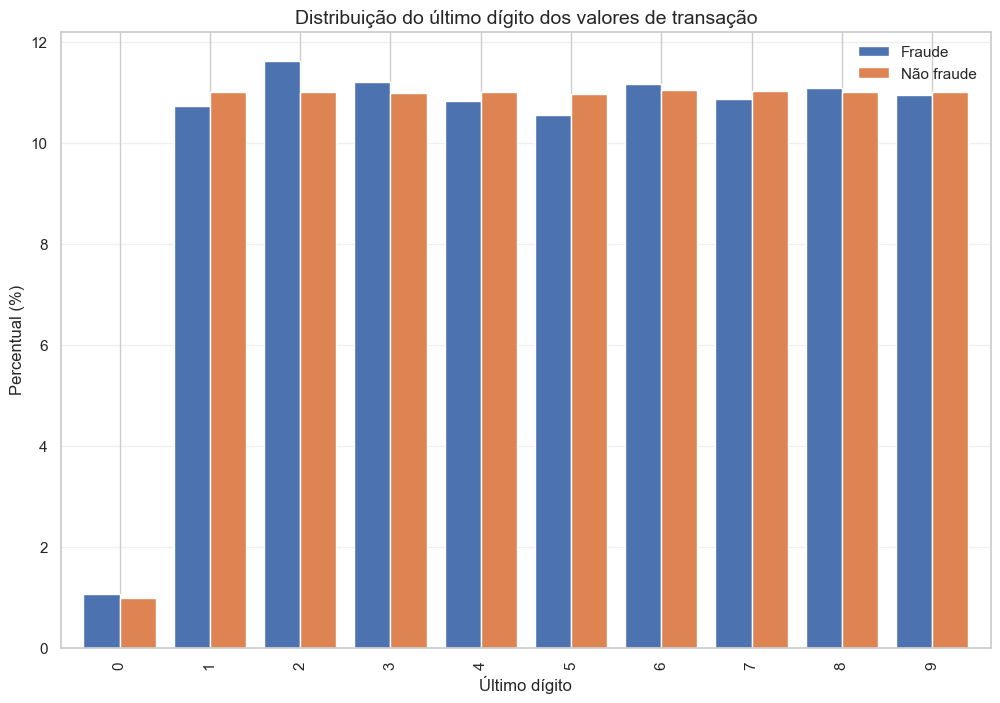

In [25]:
# Análise do último dígito
# Separar por classe
last_digit_fraud = train_df[train_df['is_fraud'] == 1]['last_digit'].value_counts(normalize=True).sort_index() * 100
last_digit_non_fraud = train_df[train_df['is_fraud'] == 0]['last_digit'].value_counts(normalize=True).sort_index() * 100

# Criar DataFrame para plotagem
last_digit_df = pd.DataFrame({
    'Fraude': last_digit_fraud,
    'Não fraude': last_digit_non_fraud
})

# Plotar
plt.figure(figsize=(12, 6))
last_digit_df.plot(kind='bar', width=0.8)
plt.title('Distribuição do último dígito dos valores de transação', fontsize=14)
plt.xlabel('Último dígito', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## 10. Correlações entre Variáveis

Vamos analisar as correlações entre as variáveis numéricas para identificar relações importantes.

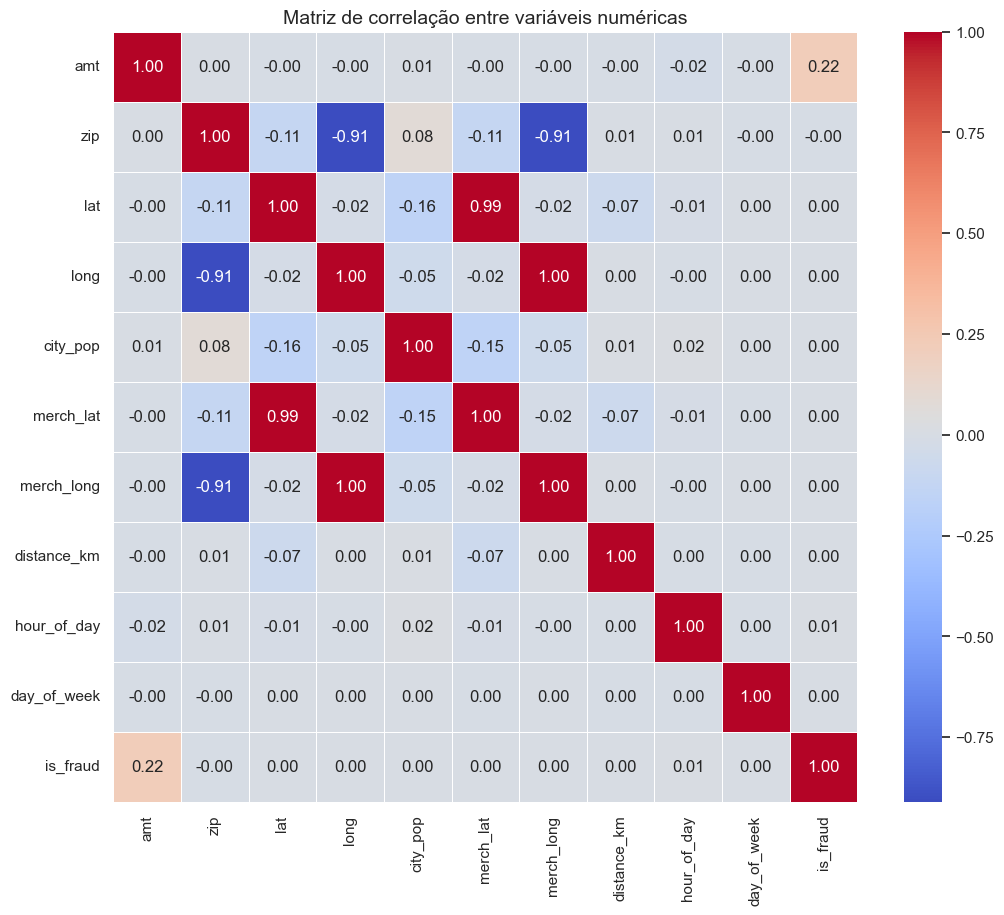

In [26]:
# Selecionar variáveis numéricas relevantes
numeric_cols = ['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 
                'distance_km', 'hour_of_day', 'day_of_week', 'is_fraud']

# Calcular matriz de correlação
corr_matrix = train_df[numeric_cols].corr()

# Plotar mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlação entre variáveis numéricas', fontsize=14)
plt.show()

In [27]:
# Correlações com a variável alvo (is_fraud)
fraud_corr = corr_matrix['is_fraud'].sort_values(ascending=False)
print("Correlações com a variável 'is_fraud':")
print(fraud_corr)

Correlações com a variável 'is_fraud':
is_fraud       1.00
amt            0.22
hour_of_day    0.01
city_pop       0.00
lat            0.00
merch_lat      0.00
day_of_week    0.00
merch_long     0.00
long           0.00
distance_km    0.00
zip           -0.00
Name: is_fraud, dtype: float64


## 11. Conclusões

Vamos resumir os principais insights obtidos na análise exploratória.

### Principais Insights:

1. **Desbalanceamento dos Dados**:
   - Apenas cerca de 0,6% das transações são fraudulentas, o que representa um forte desbalanceamento.
   - Será necessário aplicar técnicas de balanceamento para treinar modelos eficazes.

2. **Padrões Temporais**:
   - As fraudes ocorrem com maior frequência durante a madrugada (entre 22h e 3h).
   - Há maior incidência de fraudes nos finais de semana (sexta e sábado).

3. **Padrões Geográficos**:
   - A distância entre cliente e comerciante é um indicador importante.
   - Transações fraudulentas tendem a ter distâncias maiores entre cliente e comerciante.

4. **Valores de Transação**:
   - Transações fraudulentas apresentam distribuição de valores diferente das legítimas.
   - Há uma concentração de fraudes em valores específicos.

5. **Padrões de Dígitos**:
   - A distribuição do primeiro dígito nas transações fraudulentas mostra desvios da Lei de Benford.
   - O último dígito das transações fraudulentas tem uma distribuição quase uniforme, exceto pelo dígito 0.

### Próximos Passos:

1. **Feature Engineering**:
   - Criar features baseadas nos padrões temporais (hora do dia, dia da semana).
   - Utilizar a distância entre cliente e comerciante como feature.
   - Extrair informações dos dígitos dos valores de transação.
   - Calcular velocidade entre transações consecutivas do mesmo cartão.
   - Detectar desvios do padrão de gastos por cliente.

2. **Balanceamento dos Dados**:
   - Aplicar undersampling da classe majoritária para equilibrar o conjunto de treino.

3. **Modelagem**:
   - Treinar diferentes algoritmos (Regressão Logística, Random Forest, Gradient Boosted Trees, XGBoost).
   - Avaliar com métricas apropriadas para dados desbalanceados (AUC-ROC, Precision, Recall, F1-Score).